## Model Building and Evaluation

In this section, I performed the following:
* **Split the dataset into training and testing sets:** The dataset is divided into training (80%) and testing (20%) sets to ensure models are trained on one portion and tested on unseen data.
* **Train baseline models (Logistic Regression):** A simple Logistic Regression model is trained first as a benchmark to compare against more complex models.
* **Train advanced models (Random Forest, XGBoost):** More powerful models like Random Forest (ensemble-based) and XGBoost (gradient boosting) are trained to improve accuracy and performance.
* **Perform Cross-Validation:** Use cross-validation to assess model performance across different splits of the dataset.
* **Evaluate models and save the best-performing one:** Models are assessed using metrics such as classification report, confusion matrix, and AUC-ROC score. The best-performing model is saved for later use in deployment.
* **Plot Confusion Matrix for Best Models on Test Set:** Generate and visualize the confusion matrix for the best-performing model to analyze predictions.
* **Interactive Dashboard:** Interactive Dashboardthree tuned machine learning models (Logistic Regression, Random Forest, and XGBoost), computes classification metrics and AUC-ROC scores, and stores the results for visualization in an interactive dashboard

In [1]:
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

In [2]:
# Load preprocessed data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

### Baseline Model

In [3]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

### Advanced Model

In [4]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## Hyperparameter Tuning

### Logistic Regression

In [5]:
# Logistic Regression Hyperparameter Tuning using GridSearchCV
logistic_params = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2']}
logistic_grid = GridSearchCV(LogisticRegression(max_iter=1000), logistic_params, cv=5, scoring='roc_auc', n_jobs=-1)
logistic_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2']},
             scoring='roc_auc')

In [6]:
# Display the best parameters
print(f"Best Parameters: {logistic_grid.best_params_}")

# Display the best score
print(f"Best ROC-AUC Score: {logistic_grid.best_score_:.4f}")

Best Parameters: {'C': 1, 'penalty': 'l2'}
Best ROC-AUC Score: 0.7277


### RandomForest Hyperparameter Tuning

In [7]:
# RandomForest Hyperparameter Tuning using RandomizedSearchCV

# Define hyperparameter search space
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV for faster tuning
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=20,  # Number of random combinations to try
    cv=3,       # Reduce folds to speed up tuning
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

# Fit the model
rf_random.fit(X_train, y_train)

# Display best parameters and best score
print(f"Best Parameters: {rf_random.best_params_}")
print(f"Best ROC-AUC Score: {rf_random.best_score_:.4f}")

Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Best ROC-AUC Score: 0.7804


### xgb Hyperparameter Tuning

In [16]:
# Define hyperparameter search space
xgb_params = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

# Initialize the XGBoost model (removed use_label_encoder=False)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Use RandomizedSearchCV for faster hyperparameter tuning
xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_params,
    n_iter=20,  # Number of random combinations to try
    scoring='roc_auc',  # Evaluation metric
    cv=5,  # Cross-validation folds
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=2  # Shows progress during tuning
)

# Fit the model to the training data
xgb_random.fit(X_train, y_train)

# Display the best parameters and best score
print(f"Best Parameters: {xgb_random.best_params_}")
print(f"Best ROC-AUC Score: {xgb_random.best_score_:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 1.0}
Best ROC-AUC Score: 0.7852


## Cross-Validation

In [19]:
# Evaluate with Cross-Validation
def evaluate_with_cross_validation(model, X_train, y_train):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"Cross-Validation AUC-ROC Scores: {scores}")
    print(f"Mean AUC-ROC Score: {scores.mean():.4f}\n")
    
# Cross-validate each tuned model
print("Logistic Regression Cross-Validation:")
evaluate_with_cross_validation(logistic_grid.best_estimator_, X_train, y_train)

print("Random Forest Cross-Validation:")
evaluate_with_cross_validation(rf_random.best_estimator_, X_train, y_train) 

# print("Random Forest Cross-Validation:")
# evaluate_with_cross_validation(rf_grid.best_estimator_, X_train, y_train)

print("XGBoost Cross-Validation:")
evaluate_with_cross_validation(xgb_random.best_estimator_, X_train, y_train)


Logistic Regression Cross-Validation:
Cross-Validation AUC-ROC Scores: [0.7282159  0.73533008 0.72097807 0.72890198 0.72529924]
Mean AUC-ROC Score: 0.7277

Random Forest Cross-Validation:
Cross-Validation AUC-ROC Scores: [0.77692743 0.78516816 0.76931819 0.78804932 0.78234733]
Mean AUC-ROC Score: 0.7804

XGBoost Cross-Validation:
Cross-Validation AUC-ROC Scores: [0.78107129 0.79483185 0.77546429 0.79153895 0.78330545]
Mean AUC-ROC Score: 0.7852



## Plot Confusion Matrix for Best Models on Test Set

Logistic Regression (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000

AUC-ROC Score: 0.7102



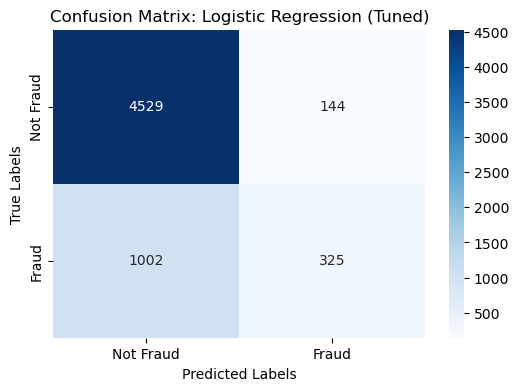

Random Forest (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000

AUC-ROC Score: 0.7744



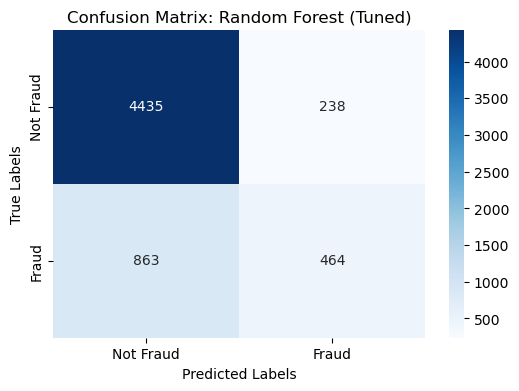

XGBoost (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

AUC-ROC Score: 0.7793



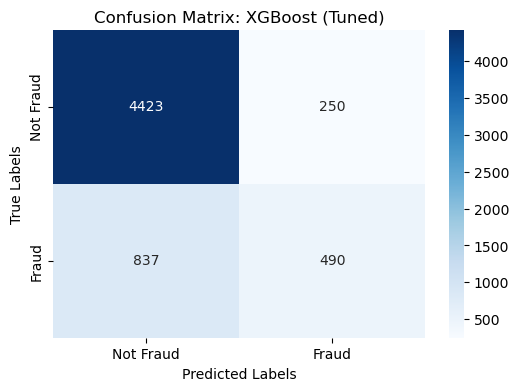

NameError: name 'pd' is not defined

In [24]:
# Plot Confusion Matrix for Best Models on Test Set
for model, name in zip(
    [logistic_grid.best_estimator_, rf_random.best_estimator_, xgb_random.best_estimator_],
    ['Logistic Regression (Tuned)', 'Random Forest (Tuned)', 'XGBoost (Tuned)']
):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Print classification metrics
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC Score: {roc_auc_score(y_test, y_proba):.4f}\n")

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    
# Save Confusion Matrices to CSV Files
for model, name in zip(
    [logistic_grid.best_estimator_, rf_random.best_estimator_, xgb_random.best_estimator_],
    ['logistic', 'rf', 'xgb']
):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=["Not Fraud", "Fraud"], columns=["Not Fraud", "Fraud"])
    cm_df.to_csv(f"confusion_matrix_{name}.csv", index=False)

print("Confusion matrices saved as CSV files!")
    
# Initialize an empty list to store metrics
metrics = []

# Evaluate each model and collect metrics
for model, name in zip(
    [logistic_grid.best_estimator_, rf_random.best_estimator_, xgb_random.best_estimator_],
    ['Logistic Regression (Tuned)', 'Random Forest (Tuned)', 'XGBoost (Tuned)']
):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    auc_roc = roc_auc_score(y_test, y_proba)

    # Append metrics to the list
    metrics.append({
        "Model": name,
        "Accuracy": report['accuracy'],
        "Precision": report['1']['precision'],  # For the positive class (fraud)
        "Recall": report['1']['recall'],        # For the positive class (fraud)
        "F1-Score": report['1']['f1-score'],    # For the positive class (fraud)
        "ROC-AUC": auc_roc
    })

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Save the metrics to a CSV file
metrics_df.to_csv("model_metrics.csv", index=False)

print("Model metrics saved as model_metrics.csv!")

## BUILDING INTERACTIVE DASHBOARD

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import dash_bootstrap_components as dbc
import dash  # Use Dash instead of JupyterDash
from dash import dcc, html, Input, Output  # Condense all Dash-related imports
import pickle  # For loading saved models

In [ ]:
# Initialize the app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Load your dataset

data_credit_card = pd.read_csv('C:/Users/user/Documents/PROJECTS/DATA SCIENCE PROJECTS/CREDIT CARD FRAUD DETECTION/credit.csv') 
model_metrics = pd.read_csv("C:/Users/user/Documents/PROJECTS/DATA SCIENCE PROJECTS/CREDIT CARD FRAUD DETECTION/model_metrics.csv")  # File to store model evaluations


In [25]:
# App Layout
app.layout = html.Div([
    html.H1("Fraud Detection Dashboard", style={"text-align": "center"}),

    # Section 1: Model Performance Metrics
    html.H3("1. Model Performance Metrics"),
    dcc.Graph(
        id="model-metrics-bar-chart",
        style={"height": "500px"}
    ),

    # Section 2: Confusion Matrix Visualizations
    html.H3("2. Confusion Matrix Visualization"),
    dcc.Dropdown(
        id="confusion-matrix-selector",
        options=[
            {"label": "Logistic Regression", "value": "logistic"},
            {"label": "Random Forest", "value": "rf"},
            {"label": "XGBoost", "value": "xgb"}
        ],
        value="logistic",
        style={"width": "50%"}
    ),
    dcc.Graph(id="confusion-matrix-plot"),

    # Section 3: Data Exploration
    html.H3("3. Data Exploration"),
    dcc.Dropdown(
        id="data-exploration-selector",
        options=[
            {"label": "Histogram: Limit Balance", "value": "hist_limit_bal"},
            {"label": "Scatter Plot: Limit Balance vs Age", "value": "scatter_limit_age"}
        ],
        value="hist_limit_bal",
        style={"width": "50%"}
    ),
    dcc.Graph(id="data-exploration-plot")
])

Model metrics saved as model_metrics.csv!


In [ ]:
@app.callback(
    Output("model-metrics-bar-chart", "figure"),
    Input("model-metrics-bar-chart", "id")
)
def update_model_metrics_bar_chart(_):
    fig = px.bar(
        model_metrics,
        x="Model",
        y=["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"],
        barmode="group",
        title="Model Performance Metrics",
        labels={"value": "Score", "variable": "Metric"}
    )
    return fig


# Update Confusion Matrix Plot
@app.callback(
    Output("confusion-matrix-plot", "figure"),
    Input("confusion-matrix-selector", "value")
)
def update_confusion_matrix_plot(model_type):
    if model_type == "logistic":
        cm = pd.read_csv(r"C:\Users\user\Documents\PROJECTS\DATA SCIENCE PROJECTS\CREDIT CARD FRAUD DETECTION\confusion_matrix_logistic.csv")
    elif model_type == "rf":
        cm = pd.read_csv(r"C:\Users\user\Documents\PROJECTS\DATA SCIENCE PROJECTS\CREDIT CARD FRAUD DETECTION\confusion_matrix_rf.csv")
    elif model_type == "xgb":
        cm = pd.read_csv(r"C:\Users\user\Documents\PROJECTS\DATA SCIENCE PROJECTS\CREDIT CARD FRAUD DETECTIONconfusion_matrix_xgb.csv")
    
    fig = px.imshow(
        cm.values,
        labels=dict(x="Predicted", y="Actual"),
        x=["Not Fraud", "Fraud"],
        y=["Not Fraud", "Fraud"],
        text_auto=True,
        title=f"Confusion Matrix: {model_type.capitalize()}"
    )
    return fig


# Update Data Exploration Plot
@app.callback(
    Output("data-exploration-plot", "figure"),
    Input("data-exploration-selector", "value")
)
def update_data_exploration_plot(plot_type):
    if plot_type == "hist_limit_bal":
        return px.histogram(data_credit_card, x="LIMIT_BAL", title="Histogram of Limit Balance")
    elif plot_type == "scatter_limit_age":
        return px.scatter(
            data_credit_card,  # Ensure this variable exists
            x="LIMIT_BAL",
            y="AGE",
            color="default.payment.next.month",
            title="Limit Balance vs Age (Fraud Highlighted)"
        )
    return px.scatter()  # Return an empty figure to avoid errors

In [ ]:
# Run the app in Jupyter
app.run_server(mode="inline", debug=True)

## Conclusion
The objective of predicting credit card payment defaults was analyzed using Logistic Regression, Random Forest, and XGBoost models. Below are the key takeaways:

### Logistic Regression:
- **Strengths:** High recall for non-defaults (0.97) and reasonable AUC-ROC score (0.7103).
- **Weaknesses:** Poor recall for defaults (0.24), missing many defaulting customers.

### Random Forest:
- **Strengths:** Improved recall for defaults (0.35) and a better AUC-ROC score (0.7750).
- **Weaknesses:** Still struggles with default recall and slightly more false positives.

### XGBoost:
- **Strengths:** Best AUC-ROC score (0.7795) and improved precision for defaults (0.61).
- **Weaknesses:** Recall for defaults remains low (0.37), slightly higher than Random Forest.

### Key Insight:
All models effectively identify non-defaulting customers but struggle with recall for defaults, which is critical for mitigating credit risk. XGBoost shows the best overall performance but requires further optimization to improve default classification.

### Recommendations:
- **Enhance feature engineering** (e.g., derive new features from payment history).
- **Balance the dataset** (e.g., using SMOTE or cost-sensitive learning).
- **Adjust classification thresholds** to improve recall for defaults while maintaining overall accuracy.